## Download data  

In [ ]:
!gdown --id 1T8g1-RjVgW3T8wx5VEb9UYPM61XQThEC
!gdown --id 1fO5B_2QlZU5eaxY-qI9P_INH3n33xeDk
!gdown --id 111BNUaR5t7oTAI9BRwEVnSDM-M_6bncY

Downloading...
From: https://drive.google.com/uc?id=1T8g1-RjVgW3T8wx5VEb9UYPM61XQThEC
To: /content/COVID-19_Daily_Testing.csv
100% 21.4k/21.4k [00:00<00:00, 8.01MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fO5B_2QlZU5eaxY-qI9P_INH3n33xeDk
To: /content/Pokemon.csv
100% 44.0k/44.0k [00:00<00:00, 35.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=111BNUaR5t7oTAI9BRwEVnSDM-M_6bncY
To: /content/wifi_localization.csv
100% 60.1k/60.1k [00:00<00:00, 50.9MB/s]


# Linear Regression


**Linear Regression:** Cho 1 tập data **COVID-19_Daily_Testing.csv** thống kê về tình hình COVID ở Chicago. Trong bài tập này sẽ sử dụng 2 feature trong tập data là Tests (số lượng test trong 1 ngày) và Cases (số lượng ca nhiễm trong ngày). Yêu cầu đề bài thiết kế linear regression model dự đoán sô ca nhiễm dựa trên số lượng test trong một ngày (nhận input là số lượng test và predict ra được số ca nhiễm COVID tương ứng trong ngày).
- Thực hiện theo kiểu numpy
- Thực hiện theo kiểu researcher
- Thực hiện theo kiểu engineer

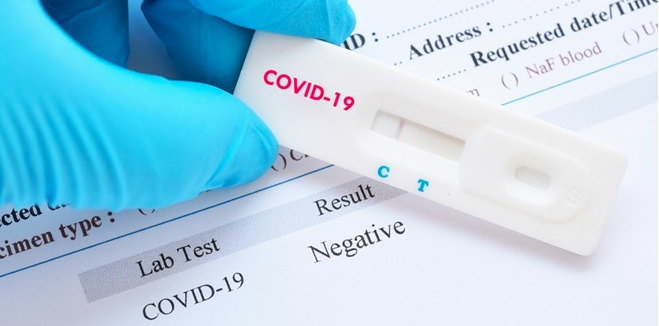

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
data = pd.read_csv("/content/COVID-19_Daily_Testing.csv")
data.head()

,Date,Day,Tests,Cases,People Not-Positive - Total,People Tested - Age 0-17,People Tested - Age 18-29,People Tested - Age 30-39,People Tested - Age 40-49,People Tested - Age 50-59,People Tested - Age 60-69,People Tested - Age 70-79,People Tested - Age 80+,People Tested - Age Unknown,People Tested - Female,People Tested - Male,People Tested - Gender Unknown,People Tested - Latinx,People Tested - Asian Non-Latinx,People Tested - Black Non-Latinx,People Tested - White Non-Latinx,People Tested - Other Race Non-Latinx,People Tested - Unknown Race/Ethnicity,People Positive - Age 0-17,People Positive - Age 18-29,People Positive - Age 30-30,People Positive - Age 40-49,People Positive - Age 50-59,People Positive - Age 60-69,People Positive - Age 70-79,People Positive - Age 80+,People Positive - Age Unknown,People Positive - Female,People Positive - Male,People Positive - Gender Unknown,People Positive - Latinx,People Positive - Asian Non-Latinx,People Positive - Black Non-Latinx,People Positive - White Non-Latinx,People Positive - Other Race Non-Latinx,People Positive - Unknown Race/Ethnicity,People Not-Positive - Age 0-17,People Not-Positive - Age 18-29,People Not-Positive - Age 30-39,People Not-Positive - Age 40-49,People Not-Positive - Age 50-59,People Not-Positive - Age 60-69,People Not-Positive - Age 70-79,People Not-Positive - Age 80+,People Not-Positive - Age Unknown,People Not-Positive - Female,People Not-Positive - Male,People Not-Positive - Gender Unknown,People Not-Positive - Latinx,People Not-Positive - Asian Non-Latinx,People Not-Positive - Black Non-Latinx,People Not-Positive - White Non-Latinx,People Not-Positive - Other Race Non-Latinx,People Not-Positive - Unknown Race/Ethnicity
0,03-01-20,Sunday,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,05-02-20,Saturday,"2,431",705,"1,726",129,470,458,458,412,281,128,94,1,"1,238","1,158",35,569,39,376,276,73,"1,098",24,141,120,152,137,76,39,16,0,340,361,4,343,9,103,51,22,177,105,329,338,306,275,205,89,78,1,898,797,31,226,30,273,225,51,921
2,05/14/2020,Thursday,"4,098",772,"3,326",260,805,833,685,604,471,253,171,16,"2,049","1,786",263,848,55,581,510,144,"1,960",48,167,153,131,107,95,42,29,0,395,362,15,319,12,151,68,35,187,212,638,680,554,497,376,211,142,16,"1,654","1,424",248,529,43,430,442,109,"1,773"
3,03-05-20,Thursday,17,1,16,4,2,0,4,3,2,0,2,0,8,9,0,2,0,5,2,1,7,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,4,2,0,4,2,2,0,2,0,7,9,0,2,0,4,2,1,7
4,03-06-20,Friday,18,3,15,1,5,1,3,3,2,2,0,1,8,10,0,2,0,1,5,1,9,0,0,0,2,0,1,0,0,0,0,3,0,0,0,0,3,0,0,1,5,1,1,3,1,2,0,1,8,7,0,2,0,1,2,1,9


In [ ]:
data['Cases'] = data['Cases'].str.replace(',', '')
data['Tests'] = data['Tests'].str.replace(',', '')
data['Cases'] = pd.to_numeric(data['Cases'])     
data['Tests'] = pd.to_numeric(data['Tests'])

In [ ]:
X = data['Tests'].values.reshape(-1,1)
y = data['Cases'].values.reshape(-1,1)
X = X.astype(np.float32)
y = y.astype(np.float32)
X = (X - X.mean())/X.std()
y = (y - y.mean())/y.std()
print(X.shape)
print(y.shape)

(89, 1)
(89, 1)


Visualize

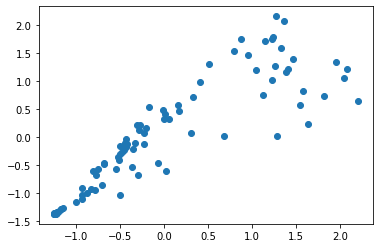

In [ ]:
plt.plot(X,y, marker='o', linestyle='')
plt.show()

## Numpy



### 1.1 Sample - Vectorization - No shuffle


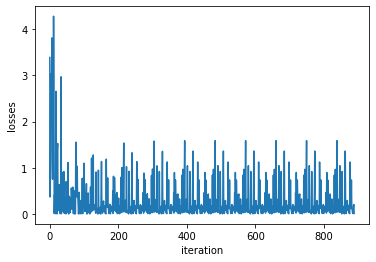

In [ ]:
# Init theta (b, w)
theta = np.array([0.04, -0.34])
# print(theta.shape)

# Get number sample
N = X.shape[0]

# Create one-column
ones = np.ones((N, 1))
# print(ones.shape)

# Add one-column to X
new_X = np.concatenate((ones, X), axis=1)
# print(new_X.shape)

epochs = 10
lr = 0.01
losses = []
for _ in range(epochs):
    for i in range(N):
        # Get 1 sample
        Xi = new_X[i, :]
        yi = y[i, :]

        # Compute output
        y_hat = theta @ Xi

        # Loss (y_hat, yi)
        loss = (y_hat - yi)**2
        losses.append(loss[0])

        # Gradient (loss, theta)
        gradient = 2*(Xi.reshape(2,1)) @ (y_hat - yi)
        # print(gradient)

        # Update theta
        theta = theta - lr*gradient

plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('losses')
plt.show()

In [ ]:
def visualize_data_linear(X, y, theta):
    x = np.arange(np.min(X), np.max(X))
    x = x.reshape(-1, 1)
    ones = np.ones((x.shape[0], 1))
    
    # Add one-column to X
    X_test = np.concatenate((ones, x), axis=1)

    # Compute output
    y_hat = X_test @ theta
    plt.plot(x, y_hat)
    
    plt.plot(X,y, marker='o', linestyle='')
    plt.show()

    return

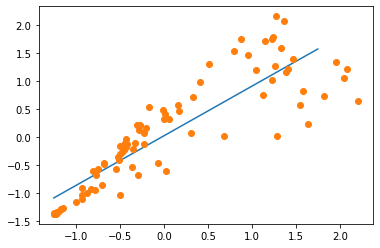

In [ ]:
visualize_data_linear(X, y, theta)

### 2.m Sample - Vectorization - No shuffle

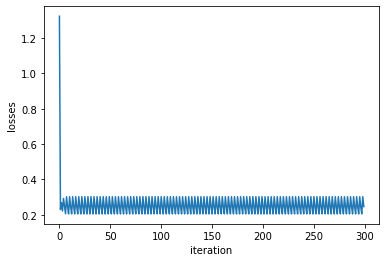

In [ ]:
# Init theta (b, w)
theta = np.array([[-0.34], [0.04]])
# print(theta.shape)

# Get number sample
N = X.shape[0]

# Create one-column
ones = np.ones((N, 1))
# print(ones.shape)

# Add one-column to X
new_X = np.concatenate((ones, X), axis=1)
# print(new_X.shape)

epochs = 100
lr = 0.01

m = 30
losses = []

for _ in range(epochs):
    for i in range(0, N, m):    
        # get m samples
        Xi = new_X[i : i + m, :]
        yi = y[i : i + m, :]
        
        # predict y_hat
        y_hat = Xi @ theta
                
        # compute loss
        loss = (y_hat - yi)**2
        losses.append(np.mean(loss))
        
        # compute gradient
        k = 2*(y_hat - yi)
        z = np.hstack((k, k))
        
        gradients = np.multiply(Xi, z)
        gradients = np.sum(gradients, axis = 0)
        gradients = gradients.reshape(2,1)

        # update weights
        theta = theta - lr*gradients

plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('losses')
plt.show()

### 3.N Sample - Vectorization - No shuffle

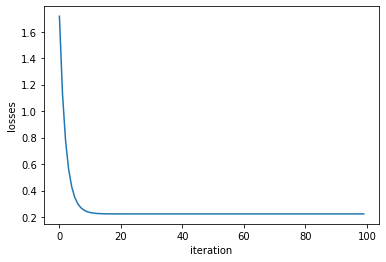

[[8.81407746e-01]
 [2.37517391e-08]]


In [ ]:
# Init theta (w, b)
theta = np.array([[-0.34], [0.04]])
# print(theta.shape)

# Get number sample
N = X.shape[0]

# Create one-column
ones = np.ones((N, 1))
# print(ones.shape)

# Add one-column to X
new_X = np.concatenate((X, ones), axis=1)
# print(new_X.shape)

epochs = 100
lr = 0.01

losses = []

for _ in range(epochs):
    # get N samples
    Xi = new_X
    yi = y
    
    # predict y_hat
    y_hat = Xi @ theta
            
    # compute loss
    loss = (y_hat - yi)**2
    losses.append(np.mean(loss))
    
    # compute gradient
    k = 2*(y_hat - yi)
    z = np.hstack((k, k))
    
    gradients = np.multiply(Xi, z)
    gradients = np.sum(gradients, axis = 0)
    gradients = gradients.reshape(2,1)

    # update weights
    theta = theta - lr*gradients

plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('losses')
plt.show()

print(theta)

## Tensorflow

### 1.Linear Regression Model - Vectorization - Researcher


In [ ]:
# Create theta
theta = tf.Variable([-0.34, 0.04])

# Add column one
ones = np.ones((X.shape[0],1))
X_new = tf.convert_to_tensor(np.concatenate((ones, X), axis=1), dtype=np.float32)

losses = []
epochs = 10

for epoch in range(epochs):
    for i in range(X.shape[0]):
        Xi = X_new[i, :]
        yi = y[i, :]

        with tf.GradientTape(persistent=True) as t:
            # Output
            y_hat = tf.reshape(Xi, (1,2)) @ tf.reshape(theta, (2,1))

            # Loss
            loss =tf.reduce_mean((y_hat - yi)**2)

        losses.append(loss.numpy())

        # Gradient
        dtheta = t.gradient(loss, theta)

        # Update theta
        theta.assign_sub(0.01*dtheta)

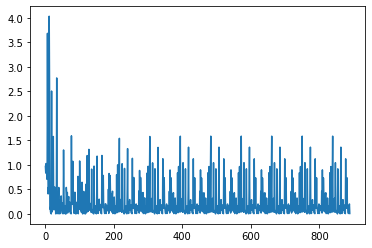

In [ ]:
plt.plot(losses)
plt.show()

### 2.Linear Regression Model - Vectorization - Engineer


In [ ]:
import tensorflow.keras as keras

model = keras.Sequential()
model.add(keras.Input(shape=(1,)))

model.add(keras.layers.Dense(1))

# model.summary()

opt = keras.optimizers.SGD(learning_rate=0.01)

model.compile(optimizer=opt, loss='mse')

history = model.fit(X, y, batch_size=32, epochs= 100)


Epoch 1/100
3/3 [==============================] - 0s 5ms/step - loss: 1.1088
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 1.0068
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 0.9154
Epoch 4/100
3/3 [==============================] - 0s 4ms/step - loss: 0.8362
Epoch 5/100
3/3 [==============================] - 0s 12ms/step - loss: 0.7662
Epoch 6/100
3/3 [==============================] - 0s 4ms/step - loss: 0.7044
Epoch 7/100
3/3 [==============================] - 0s 3ms/step - loss: 0.6496
Epoch 8/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6011
Epoch 9/100
3/3 [==============================] - 0s 3ms/step - loss: 0.5576
Epoch 10/100
3/3 [==============================] - 0s 7ms/step - loss: 0.5196
Epoch 11/100
3/3 [==============================] - 0s 5ms/step - loss: 0.4862
Epoch 12/100
3/3 [==============================] - 0s 4ms/step - loss: 0.4566
Epoch 13/100
3/3 [==============================] - 0s 4ms/s

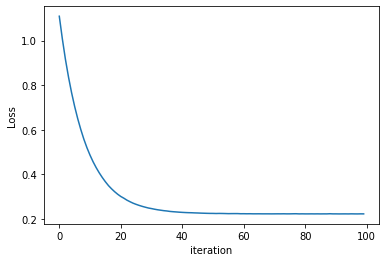

In [ ]:
plt.plot(history.history['loss'])
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.show()

# Logistic Regression


**Logistic Regression:** Cho 1 tập data **Pokemon.csv** thống kê về  các chỉ số  của các Pokemon. Trong bài tập này sẽ sử dụng 10 features trong tập data để  tạo ra Logistic Regression model (binary classification) phân loại 1 pokemon có phải là legendary (pokemon hiếm và cực mạnh) hay không? (input 10 chỉ số của Pokemon, output là legendary hay không)
- Thực hiện theo kiểu researcher
- Thực hiện theo kiểu engineer

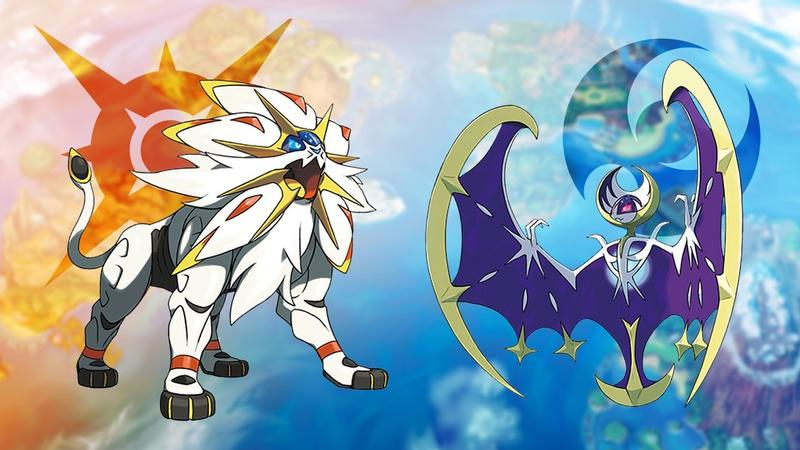

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
data = pd.read_csv("/content/Pokemon.csv")
data.drop(columns=['#','Name',	'Type 1',	'Type 2'],inplace=True)
data["Legendary"] = data["Legendary"].replace(False, 0)
data["Legendary"] = data["Legendary"].replace(True, 1)
data["Legendary"] = pd.to_numeric(data["Legendary"], downcast='integer')
data.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,318,45,49,49,65,65,45,1,0
1,405,60,62,63,80,80,60,1,0
2,525,80,82,83,100,100,80,1,0
3,625,80,100,123,122,120,80,1,0
4,309,39,52,43,60,50,65,1,0


In [ ]:
X = data.drop("Legendary",axis=1).values
y = data["Legendary"].values.reshape(-1,1)
X = X.astype(np.float32)
y = y.astype(np.float32)
X = (X - X.mean(axis=0))/X.std(axis=0)
# X = (X - X.min())/(X.max()-X.min())
print(X.shape)
print(y.shape)

(800, 8)
(800, 1)


## Numpy

### 1.1 Sample - Vectorization - No shuffle

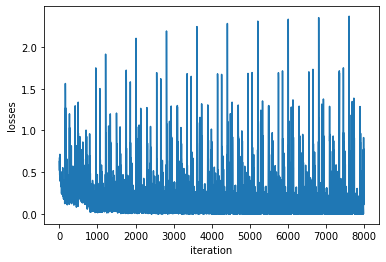

In [ ]:
# Init theta (b, w)
theta = np.random.uniform(-0.1, 0.1, (9,1))

# Get number sample
N = X.shape[0]

# Create one-column
ones = np.ones((N, 1))

# Add one-column to X
new_X = np.concatenate((ones, X), axis=1)

epochs = 10
lr = 0.01
losses = []
for _ in range(epochs):
    for i in range(N):
        # Get 1 sample
        Xi = new_X[i : i + 1]
        yi = y[i : i + 1].astype(int)

        # Compute output
        z = Xi @ theta

        # Sigmoid Activation
        y_hat = 1 / (1 + np.exp(-z))

        # Loss (y_hat, yi)
        # loss = (y_hat - yi)**2
        loss = -yi * np.log(y_hat) - (1 - yi) * np.log(1 - y_hat)
        losses.append(loss[0][0])

        # Gradient (loss, theta)
        gradients = Xi.T @ (y_hat - yi)
        # print(gradients)

        # Update theta
        theta = theta - lr*gradients
        # print(theta.shape)

plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('losses')
plt.show()

###2.m Sample - Vectorization - No shuffle

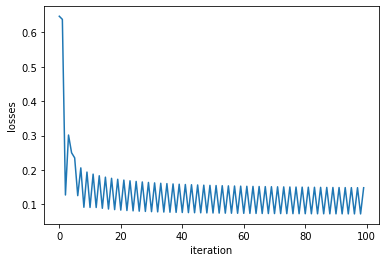

In [ ]:
# Init theta (b, w)
theta = np.random.uniform(-0.1, 0.1, (9,1))

# Get number sample
N = X.shape[0]

# Create one-column
ones = np.ones((N, 1))
# print(ones.shape)

# Add one-column to X
new_X = np.concatenate((ones, X), axis=1)
# print(new_X.shape)

epochs = 50
lr = 0.01

m = 400
losses = []

for _ in range(epochs):
    for i in range(0, N, m):    
        # Get m sample
        Xi = new_X[i : i + m]
        yi = y[i : i + m].astype(int)

        # Compute output
        z = Xi @ theta

        # Sigmoid Activation
        y_hat = 1 / (1 + np.exp(-z))

        # Loss (y_hat, yi)
        # loss = (y_hat - yi)**2
        loss = -yi * np.log(y_hat) - (1 - yi) * np.log(1 - y_hat)
        losses.append(np.mean(loss))

        # Gradient (loss, theta)
        gradients = Xi.T @ (y_hat - yi)
        # print(gradients)

        # Update theta
        theta = theta - lr*gradients
        # print(theta.shape)

plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('losses')
plt.show()

###3.N Sample - Vectorization - No shuffle

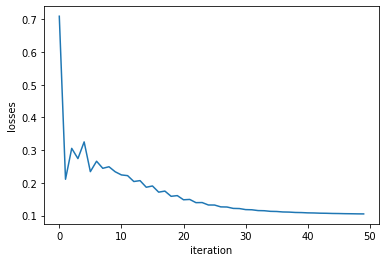

In [ ]:
# Init theta (b, w)
theta = np.random.uniform(-0.1, 0.1, (9,1))

# Get number sample
N = X.shape[0]

# Create one-column
ones = np.ones((N, 1))
# print(ones.shape)

# Add one-column to X
new_X = np.concatenate((ones, X), axis=1)
# print(new_X.shape)

epochs = 50
lr = 0.01

losses = []

for _ in range(epochs):
        # Get N sample
        Xi = new_X
        yi = y.astype(int)

        # Compute output
        z = Xi @ theta

        # Sigmoid Activation
        y_hat = 1 / (1 + np.exp(-z))

        # Loss (y_hat, yi)
        loss = -yi * np.log(y_hat) - (1 - yi) * np.log(1 - y_hat)
        losses.append(np.mean(loss))

        # Gradient (loss, theta)
        gradients = Xi.T @ (y_hat - yi)
        # print(gradients)

        # Update theta
        theta = theta - lr*gradients
        # print(theta.shape)

plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('losses')
plt.show()

##Tensorflow

###1.1 Sample - Researcher - GradientTape

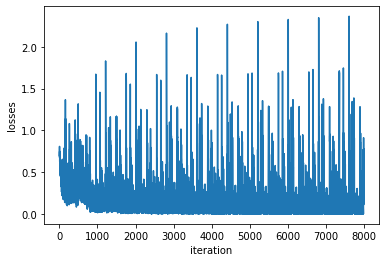

In [ ]:
# Number sample
N = X.shape[0]

# Create theta
theta = tf.Variable(tf.random.uniform((9,1), -0.1, 0.1, dtype=np.float32))

# Add column one
ones = np.ones((N, 1))
X_new = tf.convert_to_tensor(np.concatenate((ones, X), axis=1), dtype=np.float32)

losses = []
epochs = 10

for epoch in range(epochs):
    for i in range(N):
        Xi = X_new[i: i + 1, :]
        yi = tf.convert_to_tensor(y[i : i + 1, :])

        with tf.GradientTape(persistent=True) as t:
            # Output
            z = Xi @ theta 

            # Activation
            y_hat = 1 / (1 + tf.math.exp(-z))

            # Loss
            loss = - yi * tf.math.log(y_hat) - (1 - yi) * tf.math.log(1 - y_hat)

        losses.append(loss[0][0].numpy())

        # Gradient
        dtheta = t.gradient(loss, theta)

        # Update theta
        theta.assign_sub(0.01*dtheta)

plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('losses')
plt.show()

###2.m Sample - Reseacher - GradientTape

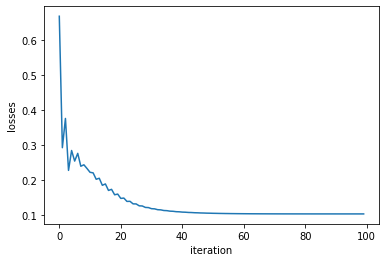

In [ ]:
# Number sample
N = X.shape[0]

# Create theta
theta = tf.Variable(tf.random.uniform((9,1), -0.1, 0.1, dtype=np.float32))

# Add column one
ones = np.ones((N, 1))
X_new = tf.convert_to_tensor(np.concatenate((ones, X), axis=1), dtype=np.float32)

losses = []
epochs = 100
m = 800

index = np.arange(N)

for epoch in range(epochs):
    for i in range(0, N, m):
        Xi = X_new[i: i + m, :]
        yi = tf.convert_to_tensor(y[i : i + m, :])

        with tf.GradientTape(persistent=True) as t:
            # Output
            z = Xi @ theta 

            # Activation
            y_hat = 1 / (1 + tf.math.exp(-z))

            # Loss
            loss = - yi * tf.math.log(y_hat) - (1 - yi) * tf.math.log(1 - y_hat)

        losses.append(tf.math.reduce_mean(loss).numpy())

        # Gradient
        dtheta = t.gradient(loss, theta)

        # Update theta
        theta.assign_sub(0.01*dtheta)

plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('losses')
plt.show()

In [ ]:
z = X_new @ theta 

# Activation
preds = 1 / (1 + tf.math.exp(-z))

preds = preds.numpy()
preds = preds.round()
# print(preds[:, 0])

acc = (preds == y)
print(acc.mean())

0.9475


###3.Keras - Engineer

In [ ]:
# create model
model = keras.Sequential([
            keras.layers.Dense(units=1, activation='sigmoid', input_shape=[8])
])

opt = keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=opt, loss = 'binary_crossentropy')

batch_size = 800
epochs = 1000

history = model.fit(X, y, batch_size, epochs)

Epoch 1/1000
1/1 [==============================] - 0s 215ms/step - loss: 0.7628
Epoch 2/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.7596
Epoch 3/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.7565
Epoch 4/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.7535
Epoch 5/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.7504
Epoch 6/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.7474
Epoch 7/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.7444
Epoch 8/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.7415
Epoch 9/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.7385
Epoch 10/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.7356
Epoch 11/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.7328
Epoch 12/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.7299
Epoch 13/1000
1/1 [===========================

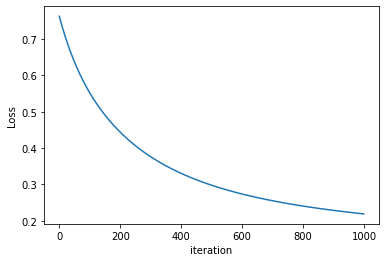

In [ ]:
# plot losses
plt.plot(history.history["loss"])
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.show()

In [ ]:
preds = model(X)

preds = preds.numpy()
preds = preds.round()
# print(preds[:, 0])

acc = (preds == y)
print(acc.mean())

0.94


# Softmax Regression

**Softmax:** Cho tập data **wifi_localization.csv** thống kê Received Signal Strength Indicator (RSSI) (dùng để đo chất lượng sóng nhận được từ các access point ở đây cụ thể là router trên một thiết bị) từ 7 router của một chiếc điện thoại và vị trí của điện thoại là  4 căn phòng khác nhau trong nhà. Thiết kế model phân loại dùng activation là Softmax để xác định xem người dùng điện thoại đang ở trong phòng nào? (input RSSI từ 7 router output phòng nào từ 0 đến 3)

- Thực hiện theo kiểu researcher
- Thực hiện theo kiểu engineer

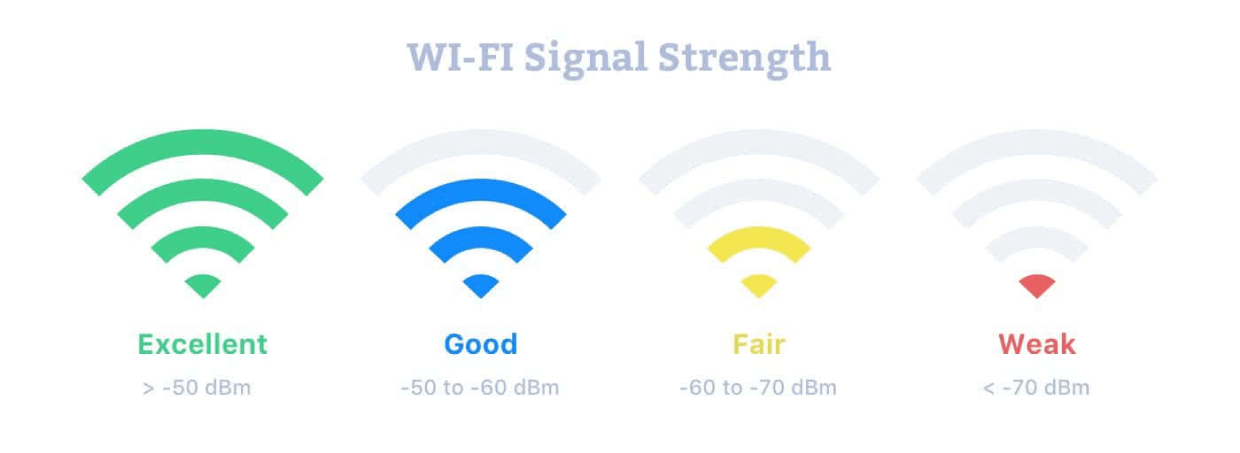

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
data = pd.read_csv("/content/wifi_localization.csv")
data.head()

,router1,router2,router3,router4,router5,router6,router7,location
0,-64,-56,-61,-66,-71,-82,-81,0
1,-68,-57,-61,-65,-71,-85,-85,0
2,-63,-60,-60,-67,-76,-85,-84,0
3,-61,-60,-68,-62,-77,-90,-80,0
4,-63,-65,-60,-63,-77,-81,-87,0


In [ ]:
X = data[["router1", "router2", "router3", "router4", "router5", "router6", "router7"]].values
y = data["location"].values.reshape(-1,1)
X = X.astype(np.float32)
y = y.astype(np.float32)
X = (X - X.mean(axis=0))/X.std(axis=0)
# X = (X - X.min())/(X.max()-X.min())
print(X.shape)
print(y.shape)
print(type(y))

(2000, 7)
(2000, 1)
<class 'numpy.ndarray'>


## Numpy

### 1.1 Sample - Vectorization - No shuffle

In [ ]:
def convert_one_hot(y, k):
    # Get len y
    N = len(y)
    
    # Reshape to vector y
    y = y.reshape((N,))

    # Convert to int
    y = y.astype(int)

    # Create matrix zeros
    one_hot = np.zeros((N, k))

    # Change value index = y by one number
    one_hot[np.arange(N), y] = 1
    
    return one_hot

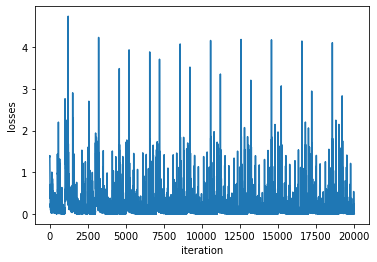

In [ ]:
# Init theta (b, w)
theta = np.random.uniform(-0.1, 0.1, (8,4))

# Get number sample
N = X.shape[0]

# Number category
k = 4

# Create one-column
ones = np.ones((N, 1))

# Add one-column to X
new_X = np.concatenate((ones, X), axis=1)

# Conver y to one hot encoding
new_y = convert_one_hot(y, k)

epochs = 10
lr = 0.01
losses = []
for _ in range(epochs):
    for i in range(N):
        # Get 1 sample
        Xi = new_X[i : i + 1]
        yi = new_y[i : i + 1]

        # Compute output
        z = Xi @ theta

        # Softmax Activation
        y_hat = np.exp(z) / np.sum(np.exp(z))

        # Loss (y_hat, yi)
        loss = -yi @ np.log(y_hat.T)
        losses.append(loss[0][0])

        # Gradient (loss, theta)
        gradients = Xi.T @ (y_hat - yi)
        # print(gradients)

        # Update theta
        theta = theta - lr*gradients
        # print(theta.shape)

plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('losses')
plt.show()

### 2.m Sample - Vectorization - No shuffle

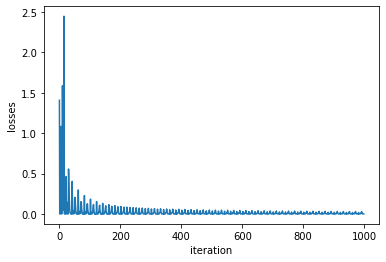

In [ ]:
# Init theta (b, w)
theta = np.random.uniform(-0.1, 0.1, (8,4))

# Get number sample
N = X.shape[0]

# Number category
k = 4

# Create one-column
ones = np.ones((N, 1))

# Add one-column to X
new_X = np.concatenate((ones, X), axis=1)

# Conver y to one hot encoding
new_y = convert_one_hot(y, k)

epochs = 50
lr = 0.01
m = 100
losses = []
for _ in range(epochs):
    for i in range(0, N, m):
        # Get m sample
        Xi = new_X[i : i + m]
        yi = new_y[i : i + m]

        # Compute output
        z = Xi @ theta

        # Softmax Activation
        temp = np.sum(np.exp(z), axis = 1)
        temp = temp.reshape(-1, 1)
        y_hat = np.exp(z) / temp

        # Loss (y_hat, yi)
        loss = np.sum(-yi * np.log(y_hat), axis = 1)
        losses.append(loss[0])

        # Gradient (loss, theta)
        gradients = Xi.T @ (y_hat - yi)
        # print(gradients)

        # Update theta
        theta = theta - lr*gradients
        # print(theta.shape)

plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('losses')
plt.show()

### 3.N Sample - Vectorization - No shuffle

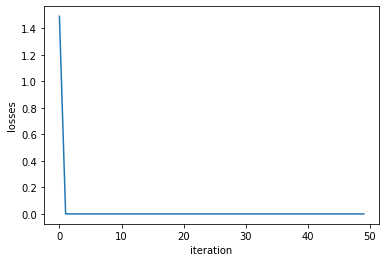

In [ ]:
# Init theta (b, w)
theta = np.random.uniform(-0.1, 0.1, (8,4))

# Get number sample
N = X.shape[0]

# Number category
k = 4

# Create one-column
ones = np.ones((N, 1))

# Add one-column to X
new_X = np.concatenate((ones, X), axis=1)

# Conver y to one hot encoding
new_y = convert_one_hot(y, k)

epochs = 50
lr = 0.01
losses = []
for _ in range(epochs):
    # Get N sample
    Xi = new_X
    yi = new_y

    # Compute output
    z = Xi @ theta

    # Softmax Activation
    temp = np.sum(np.exp(z), axis = 1)
    temp = temp.reshape(-1, 1)
    y_hat = np.exp(z) / temp

    # Loss (y_hat, yi)
    loss = np.sum(-yi * np.log(y_hat), axis = 1)
    losses.append(loss[0])

    # Gradient (loss, theta)
    gradients = Xi.T @ (y_hat - yi)
    # print(gradients)

    # Update theta
    theta = theta - lr*gradients
    # print(theta.shape)

plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('losses')
plt.show()

## Tensorflow

###1.1 Sample - Researcher - GradientTape

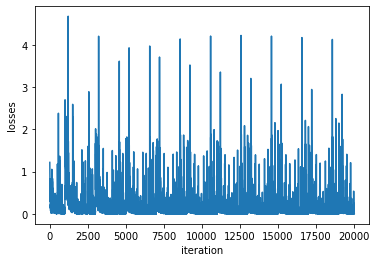

In [ ]:
# Number sample
N = X.shape[0]

# Create theta
theta = tf.Variable(tf.random.uniform((8,4), -0.1, 0.1, dtype=np.float32))

# Add column one
ones = np.ones((N, 1))
X_new = tf.convert_to_tensor(np.concatenate((ones, X), axis=1), dtype=np.float32)

# Number category
k = 4

# Conver y to one hot encoding
new_y = convert_one_hot(y, k)

losses = []
epochs = 10

for epoch in range(epochs):
    for i in range(N):
        Xi = X_new[i: i + 1, :]
        yi = tf.convert_to_tensor(new_y[i : i + 1, :], dtype=np.float32)
        # print(yi)
        with tf.GradientTape(persistent=True) as t:
            # Output
            z = Xi @ theta 

            # Activation
            y_hat = tf.math.exp(z) / tf.math.reduce_sum(tf.math.exp(z))
            # print(y_hat)
            # Loss
            loss = -yi @ tf.math.log(tf.transpose(y_hat))

        losses.append(loss[0][0].numpy())

        # Gradient
        dtheta = t.gradient(loss, theta)

        # Update theta
        theta.assign_sub(0.01*dtheta)

plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('losses')
plt.show()

###2.m Sample - Researcher - GradientTape

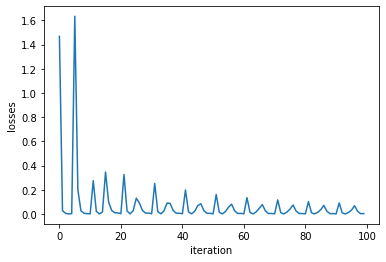

In [ ]:
# Number sample
N = X.shape[0]

# Create theta
theta = tf.Variable(tf.random.uniform((8,4), -0.1, 0.1, dtype=np.float32))

# Add column one
ones = np.ones((N, 1))
X_new = tf.convert_to_tensor(np.concatenate((ones, X), axis=1), dtype=np.float32)

# Number category
k = 4

# Conver y to one hot encoding
new_y = convert_one_hot(y, k)

losses = []
epochs = 10
m = 200

for epoch in range(epochs):
    for i in range(0, N, m):
        Xi = X_new[i: i + m, :]
        yi = tf.convert_to_tensor(new_y[i : i + m, :], dtype=np.float32)
        # print(yi)
        with tf.GradientTape(persistent=True) as t:
            # Output
            z = Xi @ theta 

            # Softmax Activation
            temp = tf.math.reduce_sum(tf.math.exp(z), axis = 1)
            temp = tf.reshape(temp, (-1, 1))
            y_hat = tf.math.exp(z) / temp

            # Loss
            loss = tf.math.reduce_sum(-yi * tf.math.log(y_hat), axis = 1)

        losses.append(loss[0].numpy())

        # Gradient
        dtheta = t.gradient(loss, theta)

        # Update theta
        theta.assign_sub(0.01*dtheta)

plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('losses')
plt.show()

###3.N Sample - Engineer

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras

# set seed
tf.random.set_seed(1234)

# create model
model = keras.Sequential()
model.add(keras.Input(shape=(7,)))
model.add(keras.layers.Dense(4, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 32        
                                                                 
Total params: 32
Trainable params: 32
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# optimizer and loss
opt = keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=opt, 
              loss='sparse_categorical_crossentropy', 
              metrics=['sparse_categorical_accuracy'])

# training
history = model.fit(X, y, epochs=50, verbose=2)

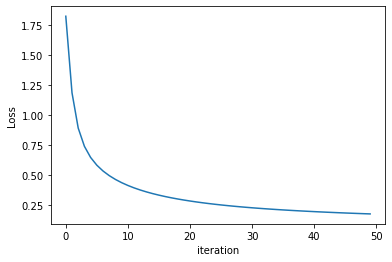

In [ ]:
# plot losses
plt.plot(history.history["loss"])
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.show()

#  Cosine Similarity Tensorflow

Dùng tensorflow viết một hàm tính Cosine Similarity (chỉ sử dụng tensorflow không dùng numpy). 

$\mathbf{x} = 
    \begin{bmatrix}
                1 \\
                3 \\
                4 \\
                3
\end{bmatrix} $
$\mathbf{y} = 
    \begin{bmatrix}
                0 \\
                3 \\
                4 \\
                0
\end{bmatrix} $
Tìm Cosine similarity của 2 vector $\textbf{x},\textbf{y} $?



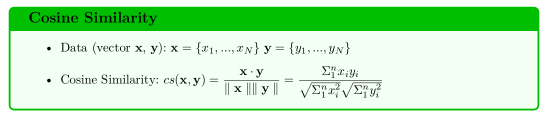

Ví dụ 

```python 
x = tf.transpose(tf.constant([[1,3,4,3]], dtype=tf.float32))
y = tf.transpose(tf.constant([[0,3,4,0]], dtype=tf.float32))
compute_CosSim(x, y)
>> <tf.Tensor: shape=(), dtype=float32, numpy=0.8451542>

```



In [ ]:
def compute_CosSim(x, y):
    norm_x = tf.norm(x)
    norm_y = tf.norm(y)
    numerator = tf.math.reduce_sum(x * y)
    denominator = norm_x*norm_y

    return numerator/denominator

x = tf.transpose(tf.constant([[1,3,4,3]], dtype=tf.float32))
y = tf.transpose(tf.constant([[0,3,4,0]], dtype=tf.float32))

print(compute_CosSim(x, y))

tf.Tensor(0.8451542, shape=(), dtype=float32)


# Correlation coefficient Tensorflow
Dùng tensorflow viết một hàm tính Cosine Similarity (chỉ sử dụng tensorflow không dùng numpy).

Cho Data $\textbf{x} = \{\;7, \;15, \;10, \;12,  \;8,  \;6, \;15\} $ và $\textbf{y} = \{\;18,  \;6, \;16, \;10, \;11, \;12, \;17\} $

Tìm correlation coefficient của Data $\textbf{x}$ và $\textbf{y}$ đã cho?

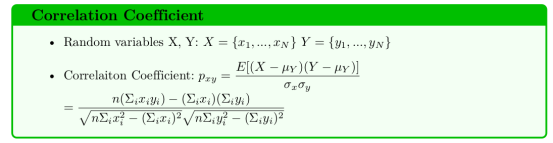

Ví dụ:


```python
x = tf.transpose(tf.constant([[7,15,10,12,8,6,15]], dtype=tf.float32))
y = tf.transpose(tf.constant([[18,6,16,10,11,12,17]], dtype=tf.float32))
compute_CorCoe(x,y)
>> <tf.Tensor: shape=(), dtype=float32, numpy=-0.2871083>

```



In [ ]:
def compute_CorCoe(x,y):
    num = tf.reduce_mean((x - tf.reduce_mean(x)) * (y-tf.reduce_mean(y)))
    den = tf.math.reduce_std(x) *  tf.math.reduce_std(y)
    return tf.math.divide_no_nan(num,den)

In [ ]:
x = tf.transpose(tf.constant([[7,15,10,12,8,6,15]], dtype=tf.float32))
y = tf.transpose(tf.constant([[18,6,16,10,11,12,17]], dtype=tf.float32))
compute_CorCoe(x,y)

<tf.Tensor: shape=(), dtype=float32, numpy=-0.2871083>